## Data Task

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import pingouin as st
import scikit_posthocs as sp
from scipy.stats import spearmanr, mannwhitneyu

In [2]:
data = pd.read_excel("data_cleaned.xlsx")
data.columns

Index(['index', 'Student Index', 'Masters Program', 'Citizenship', 'Sex',
       'Race', 'Hispanic', 'Age', 'GPA', 'Previous_Grad_School_Degree',
       'Area_of_Focus', 'GRE_Verbal_Percentile', 'GRE_Quantitative_Percentile',
       'year', 'agree_statement_A', 'agree_statement_B', 'satisfaction_A',
       'satisfaction_B', 'satisfaction_C', 'policy_areas', 'satisfaction',
       'Years_Since_Graduation', 'Work_Experience'],
      dtype='object')

### II. Data Analysis

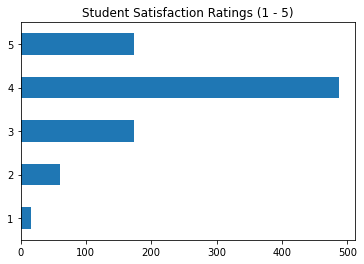

In [3]:
satisfaction_ratings = data["satisfaction"].value_counts().loc[[1,2,3,4,5]].plot(kind = "barh")
satisfaction_ratings.set_title("Student Satisfaction Ratings (1 - 5)");

In [4]:
def summary_tab(grouping, summary):
    relevant_columns = list(summary.keys())
    table = data.groupby(grouping)[list(summary.keys())].agg(summary).round(1).reset_index()
    return table

In [5]:
summary_one = {"Age": ["count", "mean"],
               "satisfaction": "mean"}

table_one = summary_tab("Work_Experience", summary_one)
table_one.columns = ["Table 1: Work Experience", "Count", "Mean Age", "Mean Satisfaction Rating"]
table_one

,Table 1: Work Experience,Count,Mean Age,Mean Satisfaction Rating
0,1 - 5 years,488,26.7,3.8
1,< 1 year,305,22.7,3.9
2,Over 5 years,120,31.0,3.9


In [6]:
summary_two = {"Age": ["count", "mean"],
               "GRE_Quantitative_Percentile": "mean",
               "GRE_Verbal_Percentile" : "mean",
               "satisfaction": "mean"}

table_two = summary_tab("Masters Program", summary_two)
table_two.columns = ["Table 2: Master's Program", "Count", "Mean Age", 
                     "Mean GRE Quant Percentile", "Mean GRE Verbal Percentile",
                     "Mean  Satisfaction Rating"]
table_two

,Table 2: Master's Program,Count,Mean Age,Mean GRE Quant Percentile,Mean GRE Verbal Percentile,Mean Satisfaction Rating
0,Master of Arts (MA) Program,4,28.8,96.0,93.0,4.0
1,Master of Arts in International Development an...,14,31.4,80.0,59.0,3.9
2,Master of Arts in International Development an...,17,30.5,63.9,78.0,4.0
3,Master of Arts in Public Policy (MA),17,27.9,72.8,81.6,3.8
4,Master of Arts in Public Policy with Certifica...,26,24.1,88.8,76.3,3.7
5,Master of Public Policy (MPP),545,25.5,73.2,75.2,3.8
6,Master of Public Policy (MPP) Studies Program,182,26.0,75.9,80.4,3.9
7,Master of Science in Computational Analysis an...,101,26.8,83.6,87.1,3.7
8,Master of Science in Environmental Science and...,6,24.2,75.2,69.7,3.3


In [7]:
st.kruskal(data, dv = "satisfaction", between = "Masters Program")

,Source,ddof1,H,p-unc
Kruskal,Masters Program,8,6.068057,0.639609


In [8]:
st.kruskal(data, dv = "satisfaction", between = "Work_Experience")

,Source,ddof1,H,p-unc
Kruskal,Work_Experience,2,5.461866,0.065158


In [9]:
sp.posthoc_dunn(data, 
                val_col = "satisfaction", 
                group_col = "Work_Experience")

,1 - 5 years,< 1 year,Over 5 years
1 - 5 years,1.000000,0.033682,0.127847
< 1 year,0.033682,1.000000,0.999082
Over 5 years,0.127847,0.999082,1.000000


In [10]:
sp.posthoc_dunn(data[~data["Masters Program"].isnull()], 
                val_col = "satisfaction", 
                group_col = "Masters Program")

,Master of Arts (MA) Program,Master of Arts in International Development and Policy,Master of Arts in International Development and Policy (MAIDP),Master of Arts in Public Policy (MA),Master of Arts in Public Policy with Certificate in Research Methods (MACRM),Master of Public Policy (MPP),Master of Public Policy (MPP) Studies Program,Master of Science in Computational Analysis and Public Policy (MSCAPP),Master of Science in Environmental Science and Policy (MSESP)
Master of Arts (MA) Program,1.000000,0.862542,0.925308,0.763708,0.593619,0.755217,0.880876,0.513376,0.516685
Master of Arts in International Development and Policy,0.862542,1.000000,0.677161,0.848604,0.569753,0.829480,0.935593,0.409837,0.511395
Master of Arts in International Development and Policy (MAIDP),0.925308,0.677161,1.000000,0.522859,0.277539,0.397116,0.614186,0.141628,0.321587
Master of Arts in Public Policy (MA),0.763708,0.848604,0.522859,1.000000,0.701550,0.965662,0.718818,0.526229,0.596332
Master of Arts in Public Policy with Certificate in Research Methods (MACRM),0.593619,0.569753,0.277539,0.701550,1.000000,0.516810,0.314586,0.832133,0.770721
Master of Public Policy (MPP),0.755217,0.829480,0.397116,0.965662,0.516810,1.000000,0.345830,0.102776,0.523102
Master of Public Policy (MPP) Studies Program,0.880876,0.935593,0.614186,0.718818,0.314586,0.345830,1.000000,0.037992,0.408658
Master of Science in Computational Analysis and Public Policy (MSCAPP),0.513376,0.409837,0.141628,0.526229,0.832133,0.102776,0.037992,1.000000,0.838991
Master of Science in Environmental Science and Policy (MSESP),0.516685,0.511395,0.321587,0.596332,0.770721,0.523102,0.408658,0.838991,1.000000


In [11]:
summary_three = {"GPA": ["count", "mean"],
                 "GRE_Quantitative_Percentile": "mean",
                 "GRE_Verbal_Percentile" : "mean",}
table_three = summary_tab("satisfaction", summary_three)
table_three.columns = ["Table 3: Overall Satisfaction", "Count", "Mean GPA", 
                       "Mean GRE Quant Percentile", "Mean GRE Verbal Percentile"]
table_three

,Table 3: Overall Satisfaction,Count,Mean GPA,Mean GRE Quant Percentile,Mean GRE Verbal Percentile
0,1,16,3.6,71.1,80.4
1,2,61,3.6,66.1,80.6
2,3,174,3.6,74.5,75.4
3,4,488,3.6,75.3,77.4
4,5,174,3.6,79.9,78.8


In [12]:
scores = ["GPA", "GRE_Verbal_Percentile", "GRE_Quantitative_Percentile"]
for i in scores:
    print("Spearman Correlation between overall satisfaction and " + i + "\n", 
          spearmanr(data[["satisfaction", i]]))

Spearman Correlation between overall satisfaction and GPA
 SpearmanrResult(correlation=0.030874421983508753, pvalue=0.35141806502754824)
Spearman Correlation between overall satisfaction and GRE_Verbal_Percentile
 SpearmanrResult(correlation=0.022441702444680092, pvalue=0.4982458735604298)
Spearman Correlation between overall satisfaction and GRE_Quantitative_Percentile
 SpearmanrResult(correlation=0.13294934580021558, pvalue=5.587662192307975e-05)


In [13]:
satisfaction_areas = ["satisfaction_A", "satisfaction_B", "satisfaction_C"]

for i in satisfaction_areas:
    print("Spearman Correlation between overall satisfaction and " + i + "\n", 
          spearmanr(data[["satisfaction", i]]))

Spearman Correlation between overall satisfaction and satisfaction_A
 SpearmanrResult(correlation=0.5742890017092164, pvalue=3.131594389661477e-81)
Spearman Correlation between overall satisfaction and satisfaction_B
 SpearmanrResult(correlation=0.3654097757209962, pvalue=3.193604998397003e-30)
Spearman Correlation between overall satisfaction and satisfaction_C
 SpearmanrResult(correlation=0.5383924960150702, pvalue=9.44454348236262e-70)


In [14]:
def data_science(student):
    if bool(re.search("Data Science", str(student["policy_areas"]))):
        coding = 1
    else:
        coding = 0
    return coding

data["interest_in_data_science"] = data.apply(data_science, axis = "columns")
data.groupby("interest_in_data_science")["satisfaction"].agg(["count", "mean"]).reset_index()

,interest_in_data_science,count,mean
0,0,722,3.832410
1,1,191,3.743455


In [15]:
data_science_0 = data.loc[data["interest_in_data_science"]  == 0, "satisfaction"]
data_science_1 = data.loc[data["interest_in_data_science"]  == 1, "satisfaction"]
mannwhitneyu(data_science_1, data_science_0, alternative = "less")

MannwhitneyuResult(statistic=63952.0, pvalue=0.04554244660218059)